# EN 553.688 Computing for Applied Mathematics_Final Assignment
# Mengqi Zhang

# PART 1: Data cleaning

In [95]:
import pandas as pd
import numpy as np

In [96]:
df_naive = pd.read_csv("TRAIN.csv")
df_naive.head()

,LID,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,...,DLQSTATUS,MODFLAG,MITYPE,RELMORTGIND,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED
0,9.466820e+11,B,"Jpmorgan Chase Bank, National Association",8.000,100000,360,32000,52000,1,359,...,0,N,NaN,N,4,2,4,363,17,False
1,9.210900e+11,R,"Gmac Mortgage, Llc",7.625,100000,180,42000,62000,0,180,...,0,N,NaN,N,4,3,5,184,32,False
2,7.387790e+11,C,"Flagstar Bank, Fsb",8.000,226000,180,32000,52000,1,179,...,0,N,NaN,N,4,2,4,183,19,False
3,6.157980e+11,R,Other,8.205,143000,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,21,False
4,3.456010e+11,R,Other,8.500,46000,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,17,False


### Remove the "ZIP" and "STATE", as they cannot not reflect the borrower's solvency

In [3]:
df_naive = df_naive.drop(["ZIP","STATE"], axis = 1)

### Remove the columns that have missing values of more than 10%

In [4]:
# View the percentage of missing values of each column
check_null = df_naive.isnull().sum(axis=0).sort_values(ascending=False)/float(len(df_naive))

# View attributes that are missing
print(check_null[check_null > 0])

# The missing value of "FIRSTFLAG", "NUMBO", "OLTV" is negligible 
# Delate the rest columns that has missing value of more than 10% 
df_del_mis = df_naive.drop(["IO", "MITYPE", "MIPCT", "CSCOREC", "OCLTV", "DTI", "CSCOREB"], axis = 1)
df_del_mis.head()

IO           0.972945
MITYPE       0.662730
MIPCT        0.662730
CSCOREC      0.520205
OCLTV        0.209125
DTI          0.037555
CSCOREB      0.019335
FIRSTFLAG    0.000560
NUMBO        0.000430
OLTV         0.000005
dtype: float64


,LID,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,...,MSA,DLQSTATUS,MODFLAG,RELMORTGIND,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED
0,9.466820e+11,B,"Jpmorgan Chase Bank, National Association",8.000,100000,360,32000,52000,1,359,...,12060,0,N,N,4,2,4,363,17,False
1,9.210900e+11,R,"Gmac Mortgage, Llc",7.625,100000,180,42000,62000,0,180,...,12540,0,N,N,4,3,5,184,32,False
2,7.387790e+11,C,"Flagstar Bank, Fsb",8.000,226000,180,32000,52000,1,179,...,42660,0,N,N,4,2,4,183,19,False
3,6.157980e+11,R,Other,8.205,143000,360,32000,52000,0,360,...,42140,0,N,N,3,2,4,363,21,False
4,3.456010e+11,R,Other,8.500,46000,360,32000,52000,0,360,...,41180,0,N,N,3,2,4,363,17,False


### Investigate correlation coefficients, remove columns with a correlation coefficient of less than 0.05 and more than 0.95 for both NMONTHS and FORCLOSED

In [5]:
corr = df_del_mis.corr()
corr_test_nm = corr.NMONTHS
corr_test_nm_mid = corr_test_nm[np.abs(corr_test_nm) < 0.05]
print(corr_test_nm_mid)
corr_remove_nm = corr_test_nm_mid[(corr_test_nm) > 0.95]
print(corr_remove_nm)

LID          0.000724
ORIGDATE     0.013314
FSTPAY      -0.037531
MATDT       -0.016288
NO_UNITS     0.018863
MSA         -0.025264
DLQSTATUS    0.006173
ACTPER_MO   -0.030188
Name: NMONTHS, dtype: float64
Series([], Name: NMONTHS, dtype: float64)


In [6]:
df_del_corr_nm = df_del_mis.drop(["LID","ORIGDATE","FSTPAY","MATDT","NO_UNITS","MSA","DLQSTATUS","ACTPER_MO"], axis=1)
df_del_corr_nm.head()

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,...,PURPOSE,PROP,OCCSTAT,MODFLAG,RELMORTGIND,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED
0,B,"Jpmorgan Chase Bank, National Association",8.000,100000,360,1,359,359,51.0,2.0,...,R,SF,P,N,N,2,4,363,17,False
1,R,"Gmac Mortgage, Llc",7.625,100000,180,0,180,180,80.0,1.0,...,C,SF,P,N,N,3,5,184,32,False
2,C,"Flagstar Bank, Fsb",8.000,226000,180,1,179,178,80.0,2.0,...,P,SF,P,N,N,2,4,183,19,False
3,R,Other,8.205,143000,360,0,360,360,77.0,2.0,...,P,SF,P,N,N,2,4,363,21,False
4,R,Other,8.500,46000,360,0,360,360,80.0,2.0,...,C,SF,P,N,N,2,4,363,17,False


In [7]:
# Do the same thing for forclosed

corr = df_del_mis.corr()
corr_test_fc = corr.FORCLOSED
corr_test_fc_mid = corr_test_fc[np.abs(corr_test_fc) < 0.05]
print(corr_test_fc_mid)
corr_remove_fc = corr_test_fc_mid[(corr_test_fc) > 0.95]
print(corr_remove_fc)

LID            0.001445
ORIGTERM       0.013951
ORIGDATE      -0.005289
FSTPAY        -0.006949
LOANAGE        0.001498
REMMNTHS       0.013917
ADJRMTHS       0.014672
MATDT         -0.007832
OLTV           0.045653
NO_UNITS       0.004518
MSA           -0.030546
DLQSTATUS      0.015124
ACTPER_MO     -0.004751
ORIGDATE_MO   -0.002852
FSTPAY_MO     -0.003942
MATDT_MO       0.013855
Name: FORCLOSED, dtype: float64
Series([], Name: FORCLOSED, dtype: float64)


In [8]:
df_del_corr_fc = df_del_mis.drop(["LID","ORIGDATE","ORIGDATE","FSTPAY","LOANAGE","REMMNTHS","ADJRMTHS","MATDT","OLTV","NO_UNITS","MSA","DLQSTATUS","ACTPER_MO","ORIGDATE_MO","FSTPAY_MO","MATDT_MO"], axis=1)
df_del_corr_fc.head()

,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,NUMBO,FIRSTFLAG,PURPOSE,PROP,OCCSTAT,MODFLAG,RELMORTGIND,NMONTHS,FORCLOSED
0,B,"Jpmorgan Chase Bank, National Association",8.000,100000,360,2.0,N,R,SF,P,N,N,17,False
1,R,"Gmac Mortgage, Llc",7.625,100000,180,1.0,N,C,SF,P,N,N,32,False
2,C,"Flagstar Bank, Fsb",8.000,226000,180,2.0,N,P,SF,P,N,N,19,False
3,R,Other,8.205,143000,360,2.0,N,P,SF,P,N,N,21,False
4,R,Other,8.500,46000,360,2.0,N,C,SF,P,N,N,17,False


### check the remaining data that has missing value, for NOMONTHS

In [9]:
check_null_nm = df_del_corr_nm.isnull().sum(axis = 0).sort_values(ascending = False)/float(len(df_del_corr_nm))
print(check_null_nm)

FIRSTFLAG      0.000560
NUMBO          0.000430
OLTV           0.000005
SELLER         0.000000
ORIGRATE       0.000000
ORIGUPB        0.000000
ORIGTERM       0.000000
LOANAGE        0.000000
REMMNTHS       0.000000
ADJRMTHS       0.000000
FORCLOSED      0.000000
NMONTHS        0.000000
PURPOSE        0.000000
PROP           0.000000
OCCSTAT        0.000000
MODFLAG        0.000000
RELMORTGIND    0.000000
ORIGDATE_MO    0.000000
FSTPAY_MO      0.000000
MATDT_MO       0.000000
CHNL           0.000000
dtype: float64


##### Check categorical variable, fill the missing data by "unknown"

In [10]:
CatColumns_nm = df_del_corr_nm.select_dtypes(include = ['object']).columns
df_del_corr_nm[CatColumns_nm] = df_del_corr_nm[CatColumns_nm].fillna("Unknown")

##### Check numrical variable, fill the missing data by "mean value"

In [11]:
NumColumns_nm = df_del_corr_nm.select_dtypes(include = [np.number]).columns

from sklearn.preprocessing import Imputer

imr_nm = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr_nm = imr_nm.fit(df_del_corr_nm[NumColumns_nm])
df_del_corr_nm[NumColumns_nm] = imr_nm.transform(df_del_corr_nm[NumColumns_nm])

C:\Users\ivvym\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### check the remaining data that has missing value for FORCLOSED

In [12]:
check_null_fc = df_del_corr_fc.isnull().sum(axis = 0).sort_values(ascending = False)/float(len(df_del_corr_fc))
print(check_null_fc)

FIRSTFLAG      0.00056
NUMBO          0.00043
FORCLOSED      0.00000
NMONTHS        0.00000
RELMORTGIND    0.00000
MODFLAG        0.00000
OCCSTAT        0.00000
PROP           0.00000
PURPOSE        0.00000
ORIGTERM       0.00000
ORIGUPB        0.00000
ORIGRATE       0.00000
SELLER         0.00000
CHNL           0.00000
dtype: float64


##### Check categorical variable, fill the missing data by "unknown"

In [13]:
CatColumns_fc = df_del_corr_fc.select_dtypes(include = ['object']).columns
df_del_corr_fc[CatColumns_nm] = df_del_corr_fc[CatColumns_nm].fillna("Unknown")

##### Check numrical variable, fill the missing data by "mean value"

In [14]:
NumColumns_fc = df_del_corr_fc.select_dtypes(include = [np.number]).columns

from sklearn.preprocessing import Imputer

imr_fc = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr_fc = imr_fc.fit(df_del_corr_fc[NumColumns_fc])
df_del_corr_fc[NumColumns_fc] = imr_fc.transform(df_del_corr_fc[NumColumns_fc])

C:\Users\ivvym\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Transform categorical variable to dummy variable and remove orginal categorical variable.

### !! Here we removed 'purpose_U' in advance as the purpose in TESTPARTIAL DO NOT INCLUDE 'purpose_U'.

##### For NMONTHS

In [15]:
#Check categorical variable
print(df_del_corr_nm.select_dtypes(include = ['object']).describe().T)

              count unique    top    freq
CHNL         200000      3      R   99954
SELLER       200000     23  Other   48507
FIRSTFLAG    200000      3      N  163845
PURPOSE      200000      4      P  144552
PROP         200000      5     SF  169045
OCCSTAT      200000      3      P  183534
MODFLAG      200000      1      N  200000
RELMORTGIND  200000      2      N  198706


In [16]:
# Transform catigorical to dummy variable
chnl_dum = pd.get_dummies(df_del_corr_nm["CHNL"], drop_first = True, prefix = "chnl")
seller_dum = pd.get_dummies(df_del_corr_nm["SELLER"], drop_first = True, prefix = "seller")
firstflag_dum = pd.get_dummies(df_del_corr_nm["FIRSTFLAG"], drop_first = True, prefix = "1stflg")
purpose_dum = pd.get_dummies(df_del_corr_nm["PURPOSE"], drop_first = True, prefix = "purpose")
prop_dum = pd.get_dummies(df_del_corr_nm["PROP"], drop_first = True, prefix = "prop")
occstat_dum = pd.get_dummies(df_del_corr_nm["OCCSTAT"], drop_first = True, prefix = "occstat")
modflag_dum = pd.get_dummies(df_del_corr_nm["MODFLAG"], drop_first = True, prefix = "modflg")
relmortgind_dum = pd.get_dummies(df_del_corr_nm["RELMORTGIND"], drop_first = True, prefix = "relmortgind")

In [17]:
# Remove categorical variable and create new dataset
df_Rev_nm = pd.concat([df_del_corr_nm, chnl_dum, seller_dum, firstflag_dum, purpose_dum, prop_dum, occstat_dum, modflag_dum, relmortgind_dum], axis = 1)
df_dummy_nm = df_Rev_nm.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'MODFLAG', 'RELMORTGIND','purpose_U'], axis = 1)
df_dummy_nm.head()

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,ORIGDATE_MO,FSTPAY_MO,...,1stflg_Y,purpose_P,purpose_R,prop_CP,prop_MH,prop_PU,prop_SF,occstat_P,occstat_S,relmortgind_Y
0,8.000,100000.0,360.0,1.0,359.0,359.0,51.0,2.0,2.0,4.0,...,0,0,1,0,0,0,1,1,0,0
1,7.625,100000.0,180.0,0.0,180.0,180.0,80.0,1.0,3.0,5.0,...,0,0,0,0,0,0,1,1,0,0
2,8.000,226000.0,180.0,1.0,179.0,178.0,80.0,2.0,2.0,4.0,...,0,1,0,0,0,0,1,1,0,0
3,8.205,143000.0,360.0,0.0,360.0,360.0,77.0,2.0,2.0,4.0,...,0,1,0,0,0,0,1,1,0,0
4,8.500,46000.0,360.0,0.0,360.0,360.0,80.0,2.0,2.0,4.0,...,0,0,0,0,0,0,1,1,0,0


##### For FORCLOSED

In [18]:
#Check categorical variable
print(df_del_corr_fc.select_dtypes(include = ['object']).describe().T)

              count unique    top    freq
CHNL         200000      3      R   99954
SELLER       200000     23  Other   48507
FIRSTFLAG    200000      3      N  163845
PURPOSE      200000      4      P  144552
PROP         200000      5     SF  169045
OCCSTAT      200000      3      P  183534
MODFLAG      200000      1      N  200000
RELMORTGIND  200000      2      N  198706


In [19]:
# Transform to dummy variable
chnl_dum = pd.get_dummies(df_del_corr_fc["CHNL"], drop_first = True, prefix = "chnl")
seller_dum = pd.get_dummies(df_del_corr_fc["SELLER"], drop_first = True, prefix = "seller")
firstflag_dum = pd.get_dummies(df_del_corr_fc["FIRSTFLAG"], drop_first = True, prefix = "1stflg")
purpose_dum = pd.get_dummies(df_del_corr_fc["PURPOSE"], drop_first = True, prefix = "purpose")
prop_dum = pd.get_dummies(df_del_corr_fc["PROP"], drop_first = True, prefix = "prop")
occstat_dum = pd.get_dummies(df_del_corr_fc["OCCSTAT"], drop_first = True, prefix = "occstat")
modflag_dum = pd.get_dummies(df_del_corr_fc["MODFLAG"], drop_first = True, prefix = "modflg")
relmortgind_dum = pd.get_dummies(df_del_corr_fc["RELMORTGIND"], drop_first = True, prefix = "relmortgind")

In [20]:
# Remove categorical variable and create new dataset
df_Rev_fc = pd.concat([df_del_corr_nm, chnl_dum, seller_dum, firstflag_dum, purpose_dum, prop_dum, occstat_dum, modflag_dum, relmortgind_dum], axis = 1)
df_dummy_fc = df_Rev_fc.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'MODFLAG', 'RELMORTGIND', 'purpose_U'], axis = 1)
df_dummy_fc.head()

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,ORIGDATE_MO,FSTPAY_MO,...,1stflg_Y,purpose_P,purpose_R,prop_CP,prop_MH,prop_PU,prop_SF,occstat_P,occstat_S,relmortgind_Y
0,8.000,100000.0,360.0,1.0,359.0,359.0,51.0,2.0,2.0,4.0,...,0,0,1,0,0,0,1,1,0,0
1,7.625,100000.0,180.0,0.0,180.0,180.0,80.0,1.0,3.0,5.0,...,0,0,0,0,0,0,1,1,0,0
2,8.000,226000.0,180.0,1.0,179.0,178.0,80.0,2.0,2.0,4.0,...,0,1,0,0,0,0,1,1,0,0
3,8.205,143000.0,360.0,0.0,360.0,360.0,77.0,2.0,2.0,4.0,...,0,1,0,0,0,0,1,1,0,0
4,8.500,46000.0,360.0,0.0,360.0,360.0,80.0,2.0,2.0,4.0,...,0,0,0,0,0,0,1,1,0,0


### Get the data set

In [21]:
df_nm = df_dummy_nm
df_fc = df_dummy_fc

# PART 2: Model Building

## For NMONTHS:

In [22]:
# Create train and test data 

X_nm = df_nm.drop(['NMONTHS', 'FORCLOSED'], axis = 1)
Y_nm = df_nm["NMONTHS"]

from sklearn.model_selection import train_test_split

Xnm_train,Xnm_test,Ynm_train,Ynm_test = train_test_split(X_nm, Y_nm, train_size = .80, shuffle = False)

### 1. Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(Xnm_train, Ynm_train)
Ynm_pred = linreg.predict(Xnm_test)

In [24]:
# Calculate Mean absolute error

mae_nm = sum(abs(Ynm_pred - Ynm_test))/len(Ynm_test)
print("the mae of linear regreesion model is:")
print(mae_nm)

the mae of linear regreesion model is:
15.615932304956921


In [25]:
# Calculate Mean squared error

from sklearn.metrics import mean_squared_error

mse_nm = mean_squared_error(Ynm_test, Ynm_pred)
print("the mse of linear regreesion model is:")
print(mse_nm)

the mse of linear regreesion model is:
803.6249793586376


In [26]:
# Calculate R2_score

from sklearn.metrics import r2_score

r2score_nm = r2_score(Ynm_test, Ynm_pred)
print("the r2 of linear regreesion model is:")
print(r2score_nm)

the r2 of linear regreesion model is:
0.1026715219497043


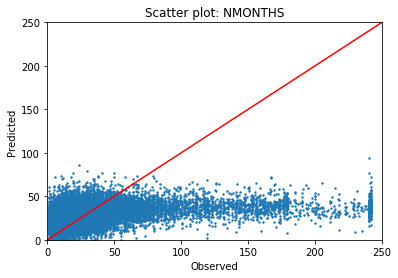

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

lineStart = 0
lineEnd = 250

plt.scatter(Ynm_test, Ynm_pred, s = 2)
plt.title("Scatter plot: NMONTHS")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], "k-", color = "r")
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

##### From the above we can tell that the mae and mse are very large while the R2 is very samll. The picture also tell us the linear regression model is not suitable for this dataset.

##### Let's try other regression models

### 2. Ridge Regression

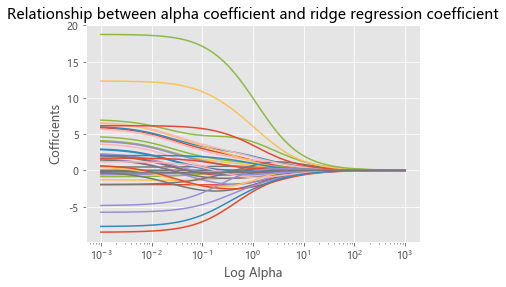

In [28]:
from sklearn.linear_model import Ridge,RidgeCV

# Different ridge regression models were generated by uncertain ALpHAS values
alphas = 10**np.linspace(-3,3,100)
ridge_cofficients = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(Xnm_train, Ynm_train)
    ridge_cofficients.append(ridge.coef_)

# Plot the logarithm of alpha and the regression coefficient
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.plot(alphas, ridge_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title('Relationship between alpha coefficient and ridge regression coefficient')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()

In [29]:
# The cross validation of ridge regression
ridge_cv = RidgeCV(alphas = alphas, normalize=True, scoring='neg_mean_squared_error', cv = 10)
ridge_cv.fit(Xnm_train, Ynm_train)
# the best lambda value
ridge_best_alpha = ridge_cv.alpha_
ridge_best_alpha

0.0015199110829529332

In [30]:
# bulid the model based on best lambda
ridge = Ridge(alpha = ridge_best_alpha, normalize=True)
ridge.fit(Xnm_train, Ynm_train)
# Ridge regression coefficient
ridge.coef_

# Prediction
ridge_predict = ridge.predict(Xnm_test)

In [31]:
# Calculate Mean absolute error

mae_nm_ridge = sum(abs(ridge_predict - Ynm_test))/len(Ynm_test)
print("the mae of linear regreesion model is:")
print(mae_nm_ridge)

the mae of linear regreesion model is:
15.61348048231662


In [32]:
# Calculate Mean squared error

mse_nm_ridge = mean_squared_error(Ynm_test, ridge_predict)
print("the mse of linear regreesion model is:")
print(mse_nm_ridge)

the mse of linear regreesion model is:
803.628065160786


In [33]:
# Calculate R2_score

from sklearn.metrics import r2_score

r2score_nm_ridge = r2_score(Ynm_test, ridge_predict)
print("the r2 of linear regreesion model is:")
print(r2score_nm_ridge)

the r2 of linear regreesion model is:
0.1026680763398532


##### After the model verification, From the above we can tell that the mae and mse are very large while the R2 is very samll. Next, we use the same logic to compare the effects of the LASSO regression model.

### 3. LASSO regression

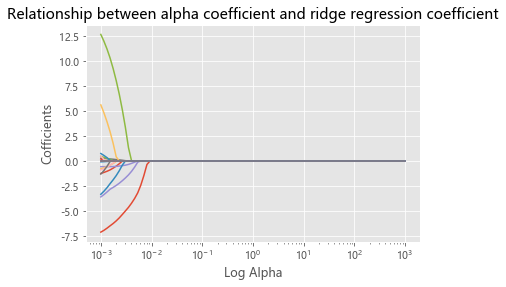

In [34]:
from sklearn.linear_model import Lasso,LassoCV

# Different LASSO regression models are generated with uncertain ALpHAS values
alphas = 10**np.linspace(-3,3,100)
lasso_cofficients = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha, normalize = True, max_iter = 10000)
    lasso.fit(Xnm_train, Ynm_train)
    lasso_cofficients.append(lasso.coef_)

# Plot the logarithm of alpha and the regression coefficient
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.plot(alphas, lasso_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title('Relationship between alpha coefficient and ridge regression coefficient')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()

In [35]:
# The cross validation of ridge regression
lasso_cv = LassoCV(alphas = alphas, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(Xnm_train, Ynm_train)
# the best lambda value
lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

0.001

In [97]:
# bulid the model based on best lambda
lasso_model = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
lassoreg = lasso_model.fit(Xnm_train, Ynm_train)

# Prediction
lasso_predict = lassoreg.predict(Xnm_test)

In [98]:
# Calculate Mean absolute error

mae_nm_lasso = sum(abs(lasso_predict - Ynm_test))/len(Ynm_test)
print("the mae of linear regreesion model is:")
print(mae_nm_lasso)

the mae of linear regreesion model is:
15.582539638346576


In [99]:
# Calculate Mean squared error

mse_nm_lasso = mean_squared_error(lasso_predict, ridge_predict)
print("the mse of linear regreesion model is:")
print(mse_nm_lasso)

the mse of linear regreesion model is:
4.773690346458299


In [100]:
# Calculate R2_score

from sklearn.metrics import r2_score

r2score_nm_lasso = r2_score(lasso_predict, ridge_predict)
print("the r2 of linear regreesion model is:")
print(r2score_nm_lasso)

the r2 of linear regreesion model is:
0.9368810746346456


##### After the model verification, From the above we can tell that the mse is smaller than ridge regression and the R2 is larger than ridge regression. 
##### The LASSO model is very well

##### Finally we try PCA to compute the principal components and use them to perform a change of basis on the data.

### 4. PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components = "mle")
pca.fit(Xnm_train)
Xnm_train_pca = pca.transform(Xnm_train)

In [41]:
import statsmodels.api as sm

ols = sm.OLS(Ynm_train, Xnm_train_pca).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                NMONTHS   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              219.2
Date:                Tue, 22 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:46:15   Log-Likelihood:                     -8.1704e+05
No. Observations:              160000   AIC:                                  1.634e+06
Df Residuals:                  159956   BIC:                                  1.635e+06
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0001   1.75e-06    -80.331      0.000      -0.000      -0.000
x2             0.0171      0.001     22.530      0.000       0.016       0.019
x3            -0.0246      0.006     -3.807      0.000      -0.037      -0.012
x4            -0.0408      0.014     -2.830      0.005      -0.069      -0.013
x5             0.9808      0.040     24.407      0.000       0.902       1.060
x6             0.5742      0.123      4.660      0.000       0.333       0.816
x7             1.3033      0.158      8.267      0.000       0.994       1.612
x8             0.2105      0.194      1.083      0.279      -0.170       0.591
x9            -2.3016      0.200    -11.488      0.000      -2.694      -1.909
x10            0.0685      0.228      0.301      0.764      -0.378       0.515
x11           -1.8624      0.244     -7.644      0.000      -2.340      -1.385
x12            1.7480      0.256      6.833      0.000       1.247       2.249
x13            6.1761      0.264     23.428      0.000       5.659       6.693
x14            1.7016      0.280      6.068      0.000       1.152       2.251
x15            1.2509      0.329      3.801      0.000       0.606       1.896
x16            6.5586      0.345     18.996      0.000       5.882       7.235
x17            2.0074      0.353      5.692      0.000       1.316       2.699
x18           -2.7412      0.436     -6.284      0.000      -3.596      -1.886
x19            4.9597      0.445     11.145      0.000       4.087       5.832
x20           -0.1320      0.481     -0.274      0.784      -1.075       0.811
x21            1.8157      0.497      3.652      0.000       0.841       2.790
x22            0.6033      0.513      1.176      0.240      -0.402       1.609
x23           -2.0733      0.536     -3.872      0.000      -3.123      -1.024
x24           -2.5212      0.537     -4.692      0.000      -3.575      -1.468
x25            4.0925      0.560      7.304      0.000       2.994       5.191
x26            0.3755      0.584      0.643      0.520      -0.770       1.521
x27           -0.6728      0.618     -1.089      0.276      -1.884       0.538
x28           -1.7992      0.657     -2.737      0.006      -3.088      -0.511
x29            2.6470      0.719      3.680      0.000       1.237       4.057
x30           -1.1695      0.759     -1.540      0.124      -2.658       0.319
x31            8.5022      0.807     10.530      0.000       6.920      10.085
x32            1.9326      0.926      2.087      0.037       0.118       3.747
x33           -1.5153      0.994     -1.525      0.127      -3.463       0.432
x34           -4.4344      1.043     -4.250      0.000      -6.479      -2.389
x35           14.0537      1.234     11.389      0.000      1

##### From the above we can tell that the R^2 of PCA is 0.057, and the P-values is not very large, indicating that the model fitting is pretty well.

### From the above discussion and the comparison of each of the evaluation criteria, we choose LASSO regression as our best model.

In [101]:
bestmodel_NMONTHS = lassoreg

## For FORCLOSED 

In [43]:
# Creat train and test data

X_fc = df_fc.drop(['NMONTHS', 'FORCLOSED'], axis = 1)
Y_fc = df_fc["FORCLOSED"]

from sklearn.model_selection import train_test_split

Xfc_train,Xfc_test,Yfc_train,Yfc_test = train_test_split(X_fc, Y_fc, train_size = .80, shuffle = False)

In [44]:
from collections import Counter

Counter(Yfc_train)

Counter({False: 158132, True: 1868})

##### As there are too much "FALSE" in dataset, we import counter, we need to use Random Under Sampler to make sure the TRUE group and FALSE group are close to each other

In [45]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [46]:
from imblearn.under_sampling import RandomUnderSampler 

Rd_fc = RandomUnderSampler(sampling_strategy = .80, random_state = 10)
Xfc_rd, Yfc_rd = Rd_fc.fit_sample(Xfc_train, Yfc_train)

In [47]:
# Import packages for graphy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# For calculation
from sklearn.metrics import accuracy_score

### 1. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logreg = LogisticRegression().fit(Xfc_rd, Yfc_rd)
Yfc_pred = logreg.predict(Xfc_test)

# Calculate accuracy

print("Train/Test split results:")
print(accuracy_score(Yfc_test, Yfc_pred))      

Train/Test split results:
0.707075


C:\Users\ivvym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix for "FORCLOSED" - Logistic: 
 [[  291   150]
 [11567 27992]]
Classification Report for "FORCLOSED" - Logistic: 
               precision    recall  f1-score   support

           1       0.02      0.66      0.05       441
           0       0.99      0.71      0.83     39559

    accuracy                           0.71     40000
   macro avg       0.51      0.68      0.44     40000
weighted avg       0.98      0.71      0.82     40000



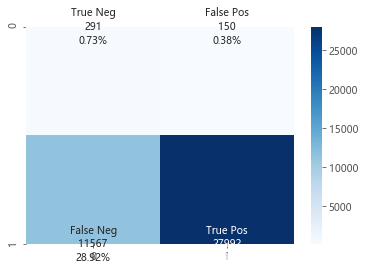

In [50]:
# Draw confusion mitrix

cm = confusion_matrix(Yfc_test, Yfc_pred, labels = [1,0])
print('Confusion Matrix for "FORCLOSED" - Logistic: \n', cm)
cm_report = classification_report(Yfc_test, Yfc_pred, labels = [1,0])
print('Classification Report for "FORCLOSED" - Logistic: \n', cm_report)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues')

In [51]:
# Calculate False positive rate and True positive rate

# fpr = fp/(fp+tn)
fpr = 150/(150+291)
print("False Positive Rate is")
print(fpr)

# tpr = tp/(tp+fn)
tpr = 27992/(27992+11567)
print("True Positive Rate is")
print(tpr)

False Positive Rate is
0.3401360544217687
True Positive Rate is
0.7076013043807983


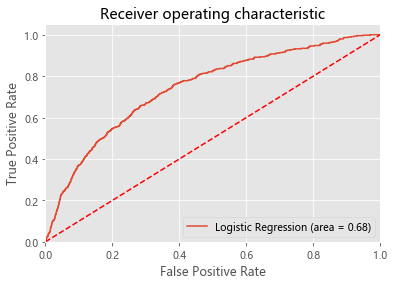

In [52]:
# Draw ROC curve

logit_roc_auc = roc_auc_score(Yfc_test, logreg.predict(Xfc_test))
fpr, tpr, thresholds = roc_curve(Yfc_test, logreg.predict_proba(Xfc_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### From the discussion we can tell that by using Logistic regression, the accuracy is 70.70%, FPR is 34.01% while the TPR is 70.77%, AUC is 0.68

### 2. Gaussian Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
gnb = GaussianNB()
gnb_fit = gnb.fit(Xfc_rd, Yfc_rd)
Yfc_pred_gnb = gnb.predict(Xfc_test)

# Calculate accuracy

print("Train/Test split results:")
print(accuracy_score(Yfc_test, Yfc_pred_gnb))   

Train/Test split results:
0.4198


Confusion Matrix for "FORCLOSED" - GNB: 
 [[  337   104]
 [23104 16455]]
Classification Report for "FORCLOSED" - GNB: 
               precision    recall  f1-score   support

           1       0.01      0.76      0.03       441
           0       0.99      0.42      0.59     39559

    accuracy                           0.42     40000
   macro avg       0.50      0.59      0.31     40000
weighted avg       0.98      0.42      0.58     40000



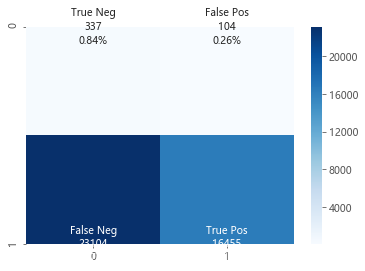

In [55]:
# Draw confusion mitrix

cm_gnb = confusion_matrix(Yfc_test, Yfc_pred_gnb, labels = [1,0])
print('Confusion Matrix for "FORCLOSED" - GNB: \n', cm_gnb)
cm_report_gnb = classification_report(Yfc_test, Yfc_pred_gnb, labels = [1,0])
print('Classification Report for "FORCLOSED" - GNB: \n', cm_report_gnb)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_gnb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_gnb.flatten()/np.sum(cm_gnb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gnb, annot = labels, fmt = '', cmap = 'Blues')

In [56]:
# Calculate False positive rate and True positive rate

# fpr = fp/(fp+tn)
fpr = 104/(104+337)
print("False Positive Rate is")
print(fpr)

# tpr = tp/(tp+fn)
tpr = 16455/(23104+16455)
print("True Positive Rate is")
print(tpr)

False Positive Rate is
0.23582766439909297
True Positive Rate is
0.4159609696908415


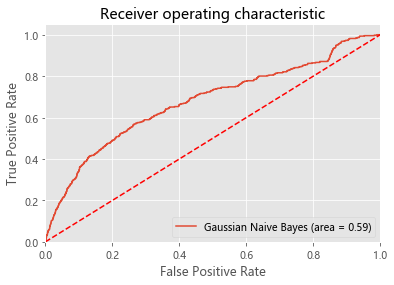

In [57]:
# Draw ROC curve

gnb_roc_auc = roc_auc_score(Yfc_test, gnb.predict(Xfc_test))
fpr, tpr, thresholds = roc_curve(Yfc_test, gnb.predict_proba(Xfc_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### From the discussion we can tell that by using Logistic regression, the accuracy is 41.98%, FPR is 23.59% while the TPR is 41.59%, AUC is 0.59

### 3. KNN

In [58]:
from sklearn import neighbors

In [59]:
knn =  neighbors.KNeighborsClassifier(n_neighbors = 1)
knn_fit = knn.fit(Xfc_rd, Yfc_rd)
Yfc_pred_knn = knn.predict(Xfc_test)

# Calculate accuracy

print("Train/Test split results:")
print(accuracy_score(Yfc_test, Yfc_pred_knn))   

Train/Test split results:
0.634725


Confusion Matrix for "FORCLOSED" - knn: 
 [[  234   207]
 [14404 25155]]
Classification Report for "FORCLOSED" - knn: 
               precision    recall  f1-score   support

           1       0.02      0.53      0.03       441
           0       0.99      0.64      0.77     39559

    accuracy                           0.63     40000
   macro avg       0.50      0.58      0.40     40000
weighted avg       0.98      0.63      0.77     40000



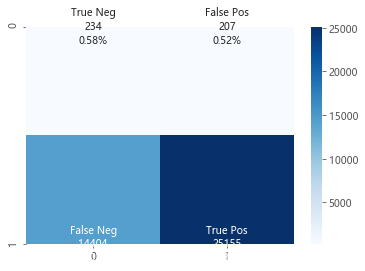

In [60]:
# Draw confusion mitrix

cm = confusion_matrix(Yfc_test, Yfc_pred_knn, labels = [1,0])
print('Confusion Matrix for "FORCLOSED" - knn: \n', cm)
cm_report = classification_report(Yfc_test, Yfc_pred_knn, labels = [1,0])
print('Classification Report for "FORCLOSED" - knn: \n', cm_report)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues')

In [61]:
# Calculate False positive rate and True positive rate

# fpr = fp/(fp+tn)
fpr = 207/(207+234)
print("False Positive Rate is")
print(fpr)

# tpr = tp/(tp+fn)
tpr = 25155/(25155+14404)
print("True Positive Rate is")
print(tpr)

False Positive Rate is
0.46938775510204084
True Positive Rate is
0.6358856391718699


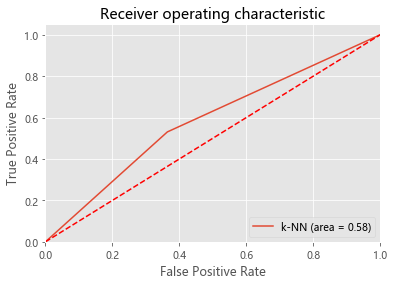

In [62]:
# Draw ROC curve

knn_roc_auc = roc_auc_score(Yfc_test, knn.predict(Xfc_test))
fpr, tpr, thresholds = roc_curve(Yfc_test, knn.predict_proba(Xfc_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='k-NN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### From the discussion we can tell that by using Logistic regression, the accuracy is 63.47%, FPR is 46.94% while the TPR is 63.59%, AUC is 0.58

### 4. Decision Tree 

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtr =  DecisionTreeClassifier()
dtr_fit = dtr.fit(Xfc_rd, Yfc_rd)
Yfc_pred_dtr = dtr.predict(Xfc_test)

# Calculate accuracy

print("Train/Test split results:")
print(accuracy_score(Yfc_test, Yfc_pred_dtr))   

Train/Test split results:
0.694075


Confusion Matrix for "FORCLOSED" - Logistic: 
 [[  265   176]
 [12061 27498]]
Classification Report for "FORCLOSED" - Logistic: 
               precision    recall  f1-score   support

           1       0.02      0.60      0.04       441
           0       0.99      0.70      0.82     39559

    accuracy                           0.69     40000
   macro avg       0.51      0.65      0.43     40000
weighted avg       0.98      0.69      0.81     40000



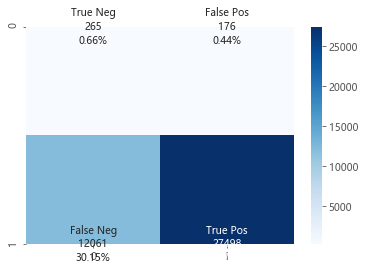

In [65]:
# Draw confusion mitrix

cm = confusion_matrix(Yfc_test, Yfc_pred_dtr, labels = [1,0])
print('Confusion Matrix for "FORCLOSED" - Logistic: \n', cm)
cm_report = classification_report(Yfc_test, Yfc_pred_dtr, labels = [1,0])
print('Classification Report for "FORCLOSED" - Logistic: \n', cm_report)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues')

In [66]:
# Calculate False positive rate and True positive rate

# fpr = fp/(fp+tn)
fpr = 179/(179+262)
print("False Positive Rate is")
print(fpr)

# tpr = tp/(tp+fn)
tpr = 27268/(27268+12291)
print("True Positive Rate is")
print(tpr)

False Positive Rate is
0.40589569160997735
True Positive Rate is
0.6892995272883541


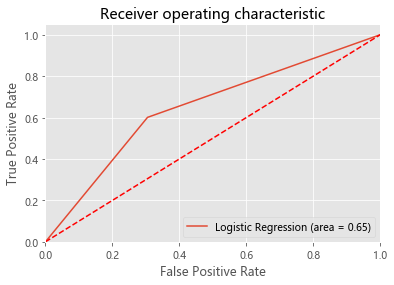

In [67]:
# Draw ROC curve

dtr_roc_auc = roc_auc_score(Yfc_test, dtr.predict(Xfc_test))
fpr, tpr, thresholds = roc_curve(Yfc_test, dtr.predict_proba(Xfc_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % dtr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### From the discussion we can tell that by using Logistic regression, the accuracy is 68.83%, FPR is 40.59% while the TPR is 68.93%, AUC is 0.65

### From the above discussion and the comparison of each of the evaluation criteria, we choose logistic regression as our best model.

In [68]:
bestmodel_FORCLOSED = logreg

# Part 3: Prediction

In [69]:
data = pd.read_csv("TESTPARTIAL.csv")
data.head()

,LID,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,...,MIPCT,IO,DLQSTATUS,MODFLAG,MITYPE,RELMORTGIND,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO
0,790182552271,R,Other,8.750,64000.0,360,52000,72000,0,360,...,NaN,NaN,0,N,NaN,N,5,4,6,365
1,466910965031,C,"Jpmorgan Chase Bank, Na",8.500,142000.0,360,32000,52000,1,359,...,30.0,NaN,0,N,1.0,N,4,2,4,363
2,423006640587,R,"Jpmorgan Chase Bank, Na",8.375,104000.0,360,42000,62000,1,359,...,30.0,NaN,0,N,1.0,N,5,3,5,364
3,485913250921,B,"Citimortgage, Inc.",8.500,119000.0,360,42000,62000,0,360,...,30.0,NaN,0,N,1.0,N,4,3,5,364
4,611522962273,R,Other,8.375,214000.0,360,42000,62000,1,359,...,NaN,NaN,0,N,NaN,N,5,3,5,364


## For NMONTHS 

### Data cleaning 

In [70]:
# Drop useless data

data_nm = data.drop(["ZIP","STATE",
                     "IO", "MITYPE", "MIPCT", "CSCOREC", "OCLTV", "DTI", "CSCOREB",
                     "LID","ORIGDATE","FSTPAY","MATDT","NO_UNITS","MSA","DLQSTATUS","ACTPER_MO"], axis = 1)

In [71]:
# Find missing data - objective

objectColumns = data_nm.select_dtypes(include=["object"]).columns
data_nm[objectColumns].isnull().sum().sort_values(ascending=False)

FIRSTFLAG      30
RELMORTGIND     0
MODFLAG         0
OCCSTAT         0
PROP            0
PURPOSE         0
SELLER          0
CHNL            0
dtype: int64

In [72]:
# Fill it with Unknown

objectColumns = data_nm.select_dtypes(include=["object"]).columns 
data_nm[objectColumns] = data_nm[objectColumns].fillna("Unknown")

In [73]:
# Make sure no missing value

data_nm[objectColumns].isnull().sum().sort_values(ascending=False)

RELMORTGIND    0
MODFLAG        0
OCCSTAT        0
PROP           0
PURPOSE        0
FIRSTFLAG      0
SELLER         0
CHNL           0
dtype: int64

In [74]:
# Find missing data - numerical

data_nm.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

NUMBO          24
MATDT_MO        0
FSTPAY_MO       0
ORIGDATE_MO     0
OLTV            0
ADJRMTHS        0
REMMNTHS        0
LOANAGE         0
ORIGTERM        0
ORIGUPB         0
ORIGRATE        0
dtype: int64

In [75]:
# The missing values are filled with the Imputer module from the Sklearn module

numColumns_nm = data_nm.select_dtypes(include=[np.number]).columns
from sklearn.preprocessing import Imputer
imr_nm = Imputer(missing_values='NaN', strategy='mean', axis=0)  
imr_nm = imr_nm.fit(data_nm[numColumns_nm])
data_nm[numColumns_nm] = imr_nm.transform(data_nm[numColumns_nm])

C:\Users\ivvym\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [76]:
# Make sure no missing value

data_nm.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

MATDT_MO       0
FSTPAY_MO      0
ORIGDATE_MO    0
NUMBO          0
OLTV           0
ADJRMTHS       0
REMMNTHS       0
LOANAGE        0
ORIGTERM       0
ORIGUPB        0
ORIGRATE       0
dtype: int64

In [77]:
# Transform to dummy variable

chnl_dum = pd.get_dummies(data_nm["CHNL"], drop_first = True, prefix = "chnl")
seller_dum = pd.get_dummies(data_nm["SELLER"], drop_first = True, prefix = "seller")
firstflag_dum = pd.get_dummies(data_nm["FIRSTFLAG"], drop_first = True, prefix = "1stflg")
purpose_dum = pd.get_dummies(data_nm["PURPOSE"], drop_first = True, prefix = "purpose")
prop_dum = pd.get_dummies(data_nm["PROP"], drop_first = True, prefix = "prop")
occstat_dum = pd.get_dummies(data_nm["OCCSTAT"], drop_first = True, prefix = "occstat")
modflag_dum = pd.get_dummies(data_nm["MODFLAG"], drop_first = True, prefix = "modflg")
relmortgind_dum = pd.get_dummies(data_nm["RELMORTGIND"], drop_first = True, prefix = "relmortgind")

In [78]:
# Remove categorical variable and create new dataset
data_Rev_nm = pd.concat([data_nm, chnl_dum, seller_dum, firstflag_dum, purpose_dum, prop_dum, occstat_dum, modflag_dum, relmortgind_dum], axis = 1)
data_dummy_nm = data_Rev_nm.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'MODFLAG', 'RELMORTGIND',], axis = 1)

In [79]:
data_nm = data_dummy_nm
data_nm.head()

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,ORIGDATE_MO,FSTPAY_MO,...,1stflg_Y,purpose_P,purpose_R,prop_CP,prop_MH,prop_PU,prop_SF,occstat_P,occstat_S,relmortgind_Y
0,8.750,64000.0,360.0,0.0,360.0,359.0,80.0,2.0,4.0,6.0,...,0,1,0,0,0,0,1,1,0,0
1,8.500,142000.0,360.0,1.0,359.0,359.0,95.0,2.0,2.0,4.0,...,0,1,0,1,0,0,0,1,0,0
2,8.375,104000.0,360.0,1.0,359.0,359.0,95.0,2.0,3.0,5.0,...,0,1,0,0,1,0,0,1,0,0
3,8.500,119000.0,360.0,0.0,360.0,360.0,97.0,1.0,3.0,5.0,...,1,1,0,0,0,1,0,1,0,0
4,8.375,214000.0,360.0,1.0,359.0,359.0,80.0,1.0,3.0,5.0,...,0,1,0,0,0,0,1,1,0,0


### Prediction

In [109]:
Ytestnm_pred = bestmodel_NMONTHS.predict(data_nm)
Ytestnm_pred

array([29.56022594, 27.67453291, 40.58602331, ..., 46.55974991,
       27.60335127, 35.37274245])

### An estimate of the mean absolute difference between predicted value and true value for NMONTHS when your predictor is used

In [108]:
Ytestmean_nm = Ytestnm_pred.mean()
Ytrainmean_nm = Y_nm.mean()
diff = abs(Ytestmean_nm - Ytrainmean_nm)
print("The estimation of mean absolute difference between predicted value and true value for NMONTHS when your predictor is used is ")
print(diff)

The estimation of mean absolute difference between predicted value and true value for NMONTHS when your predictor is used is 
0.011124142541014237


## For FORCLOSED

### Data Cleaning 

In [82]:
# Drop useless data

data_fc = data.drop(["ZIP","STATE",
                     "IO", "MITYPE", "MIPCT", "CSCOREC", "OCLTV", "DTI", "CSCOREB",
                     "LID","ORIGDATE","FSTPAY","MATDT","NO_UNITS","MSA","DLQSTATUS","ACTPER_MO"], axis = 1)

In [83]:
# Find missing data - objective

objectColumnsfc = data_fc.select_dtypes(include=["object"]).columns
data_fc[objectColumnsfc].isnull().sum().sort_values(ascending=False)

FIRSTFLAG      30
RELMORTGIND     0
MODFLAG         0
OCCSTAT         0
PROP            0
PURPOSE         0
SELLER          0
CHNL            0
dtype: int64

In [84]:
# Fill it with Unknown

objectColumnsfc = data_fc.select_dtypes(include=["object"]).columns 
data_fc[objectColumnsfc] = data_fc[objectColumnsfc].fillna("Unknown")

In [85]:
# Make sure no missing value

data_fc[objectColumnsfc].isnull().sum().sort_values(ascending=False)

RELMORTGIND    0
MODFLAG        0
OCCSTAT        0
PROP           0
PURPOSE        0
FIRSTFLAG      0
SELLER         0
CHNL           0
dtype: int64

In [86]:
# Find missing data - numerical

data_fc.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

NUMBO          24
MATDT_MO        0
FSTPAY_MO       0
ORIGDATE_MO     0
OLTV            0
ADJRMTHS        0
REMMNTHS        0
LOANAGE         0
ORIGTERM        0
ORIGUPB         0
ORIGRATE        0
dtype: int64

In [87]:
# The missing values are filled with the Imputer module from the Sklearn module

numColumns_fc = data_fc.select_dtypes(include=[np.number]).columns
from sklearn.preprocessing import Imputer
imr_fc = Imputer(missing_values='NaN', strategy='mean', axis=0)  
imr_fc = imr_fc.fit(data_fc[numColumns_fc])
data_fc[numColumns_fc] = imr_fc.transform(data_fc[numColumns_fc])

C:\Users\ivvym\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [88]:
# Make sure no missing value

data_fc.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

MATDT_MO       0
FSTPAY_MO      0
ORIGDATE_MO    0
NUMBO          0
OLTV           0
ADJRMTHS       0
REMMNTHS       0
LOANAGE        0
ORIGTERM       0
ORIGUPB        0
ORIGRATE       0
dtype: int64

In [89]:
# Transform to dummy variable

chnl_dum = pd.get_dummies(data_fc["CHNL"], drop_first = True, prefix = "chnl")
seller_dum = pd.get_dummies(data_fc["SELLER"], drop_first = True, prefix = "seller")
firstflag_dum = pd.get_dummies(data_fc["FIRSTFLAG"], drop_first = True, prefix = "1stflg")
purpose_dum = pd.get_dummies(data_fc["PURPOSE"], drop_first = True, prefix = "purpose")
prop_dum = pd.get_dummies(data_fc["PROP"], drop_first = True, prefix = "prop")
occstat_dum = pd.get_dummies(data_fc["OCCSTAT"], drop_first = True, prefix = "occstat")
modflag_dum = pd.get_dummies(data_fc["MODFLAG"], drop_first = True, prefix = "modflg")
relmortgind_dum = pd.get_dummies(data_fc["RELMORTGIND"], drop_first = True, prefix = "relmortgind")

In [90]:
# Remove categorical variable and create new dataset
data_Rev_fc = pd.concat([data_fc, chnl_dum, seller_dum, firstflag_dum, purpose_dum, prop_dum, occstat_dum, modflag_dum, relmortgind_dum], axis = 1)
data_dummy_fc = data_Rev_fc.drop(['CHNL', 'SELLER', 'FIRSTFLAG', 'PURPOSE', 'PROP', 'OCCSTAT', 'MODFLAG', 'RELMORTGIND'], axis = 1)

In [104]:
data_fc = data_dummy_fc
data_fc.head()

,ORIGRATE,ORIGUPB,ORIGTERM,LOANAGE,REMMNTHS,ADJRMTHS,OLTV,NUMBO,ORIGDATE_MO,FSTPAY_MO,...,1stflg_Y,purpose_P,purpose_R,prop_CP,prop_MH,prop_PU,prop_SF,occstat_P,occstat_S,relmortgind_Y
0,8.750,64000.0,360.0,0.0,360.0,359.0,80.0,2.0,4.0,6.0,...,0,1,0,0,0,0,1,1,0,0
1,8.500,142000.0,360.0,1.0,359.0,359.0,95.0,2.0,2.0,4.0,...,0,1,0,1,0,0,0,1,0,0
2,8.375,104000.0,360.0,1.0,359.0,359.0,95.0,2.0,3.0,5.0,...,0,1,0,0,1,0,0,1,0,0
3,8.500,119000.0,360.0,0.0,360.0,360.0,97.0,1.0,3.0,5.0,...,1,1,0,0,0,1,0,1,0,0
4,8.375,214000.0,360.0,1.0,359.0,359.0,80.0,1.0,3.0,5.0,...,0,1,0,0,0,0,1,1,0,0


### Prediction 

In [105]:
Ytestfc_pred = bestmodel_FORCLOSED.predict(data_fc)
print(Ytestfc_pred)
Ytestfc_pred.shape

[ True False  True ...  True False  True]


(71197,)

## Output 

In [106]:
Output = pd.DataFrame({'LID': data['LID'], 'NMONTHS':Ytestnm_pred, 'FORCLOSED':Ytestfc_pred})
Output.head()

,LID,NMONTHS,FORCLOSED
0,790182552271,29.560226,True
1,466910965031,27.674533,False
2,423006640587,40.586023,True
3,485913250921,26.890222,False
4,611522962273,15.249156,False


In [107]:
Output.to_csv("predictions.csv")